# Aproximación a la calidad de datos

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload
SEED = 1234
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from IPython.display import display, HTML
from time import time
import numpy as np
import numpy.ma as ma
np.set_printoptions(precision=4)
np.random.seed(SEED)
import pandas as  pd
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', 44)
pd.set_option('precision', 3)
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt


from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
presupuesto = pd.read_csv("presupuesto-ejecutado-2018-segundo-trimestre.csv")

In [3]:
display(presupuesto)

,Car,Car_desc,Jur,Jur_desc,Sjur,Sjur_desc,Ent,Ent_desc,Og,Og_desc,UE,UE_desc,Prog,Prog_desc,Sprog,Sprog_desc,Proy,Proy_desc,Actividad,Act_desc,Ob,ob_desc,Fin,Fin_desc,Fun,Fun_desc,Inc,Inc_desc,Ppal,Ppal_desc,Par,Par_desc,Spar,Spar_desc,Eco,Eco_desc,Fte,Fte_desc,Geo,Geo_desc,Sanción,Vigente,Definitivo,Devengado
0,1,Administracion Central,1,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires,1,Legislatura De La Ciudad De Buenos Aires,10,Secretaria Administrativa,16,Formacion Y Sancion De Leyes,0,Formacion Y Sancion De Leyes,0,Formacion Y Sancion De Leyes,1000,Conducción,0,Conducción,1,Administración Gubernamental,1,Legislativa,1,Gastos En Personal,1,Personal Permanente,1,Retribución Del Cargo,0,Retribución Del Cargo,21200000,Remuneraciones Al Personal,11,Tesoro De La Ciudad,1,Comuna 1,958764741,958764741,4.0181913644e+08,4.0181913644e+08
1,1,Administracion Central,1,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires,1,Legislatura De La Ciudad De Buenos Aires,10,Secretaria Administrativa,16,Formacion Y Sancion De Leyes,0,Formacion Y Sancion De Leyes,0,Formacion Y Sancion De Leyes,1000,Conducción,0,Conducción,1,Administración Gubernamental,1,Legislativa,1,Gastos En Personal,1,Personal Permanente,4,Sueldo Anual Complementario,0,Sueldo Anual Complementario,21200000,Remuneraciones Al Personal,11,Tesoro De La Ciudad,1,Comuna 1,79897062,79897062,3.2349993000e+05,3.2349993000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48799,2,Organismos Descentralizados,8,Sindicatura General De La Ciudad De Buenos Aires,0,Sindicatura General De La Ciudad De Buenos Aires,0,Sindicatura General De La Ciudad De Buenos Aires,8,Sindicatura General De La Ciudad De Buenos Aires,81,Sindicatura General De La Ciudad De Buenos Aires,16,Control Interno Del Gobierno Central Y Organismos Descentralizados.,0,Control Interno Del Gobierno Central Y Organismos Descentralizados.,0,Control Interno Del Gobierno Central Y Organismos Descentralizados.,9000,Unidad De Auditoría Interna,0,Unidad De Auditoría Interna,1,Administración Gubernamental,7,Control De La Gestión,3,Servicios No Personales,7,"Pasajes, Viáticos Y Movilidad",8,Movilidad,0,Movilidad,21320000,Servicios No Personales,11,Tesoro De La Ciudad,4,Comuna 4,8800,8800,0.0000000000e+00,0.0000000000e+00
48800,2,Organismos Descentralizados,8,Sindicatura General De La Ciudad De Buenos Aires,0,Sindicatura General De La Ciudad De Buenos Aires,0,Sindicatura General De La Ciudad De Buenos Aires,8,Sindicatura General De La Ciudad De Buenos Aires,81,Sindicatura General De La Ciudad De Buenos Aires,16,Control Interno Del Gobierno Central Y Organismos Descentralizados.,0,Control Interno Del Gobierno Central Y Organismos Descentralizados.,0,Control Interno Del Gobierno Central Y Organismos Descentralizados.,9000,Unidad De Auditoría Interna,0,Unidad De Auditoría Interna,1,Administración Gubernamental,7,Control De La Gestión,4,Bienes De Uso,3,Maquinaria Y Equipo,6,Equipo Para Computación,0,Equipo Para Computación,22140000,Maquinaria Y Equipo,11,Tesoro De La Ciudad,4,Comuna 4,22000,22000,0.0000000000e+00,0.0000000000e+00


In [4]:
presupuesto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48801 entries, 0 to 48800
Data columns (total 44 columns):
Car           48801 non-null int64
Car_desc      48801 non-null object
Jur           48801 non-null int64
Jur_desc      48801 non-null object
Sjur          48801 non-null int64
Sjur_desc     48801 non-null object
Ent           48801 non-null int64
Ent_desc      48801 non-null object
Og            48801 non-null int64
Og_desc       48801 non-null object
UE            48801 non-null int64
UE_desc       48801 non-null object
Prog          48801 non-null int64
Prog_desc     48801 non-null object
Sprog         48801 non-null int64
Sprog_desc    48801 non-null object
Proy          48801 non-null int64
Proy_desc     48801 non-null object
Actividad     48801 non-null int64
Act_desc      48801 non-null object
Ob            48801 non-null int64
ob_desc       48801 non-null object
Fin           48801 non-null int64
Fin_desc      48801 non-null object
Fun           48801 non-null int64
Fun_

# Análisis e interpretación del dataset


Queries correspondientes al primer inciso

In [5]:
X = {'Codigo': [1,2,3],
    'Descripcion': ['Descripcion para codigo 1','Descripcion para codigo 2','Descripcion para codigo 3'],
    }
 
df = pd.DataFrame(X, columns= ['Codigo', 'Descripcion'])
display(df)

,Codigo,Descripcion
0,1,Descripcion para codigo 1
1,2,Descripcion para codigo 2
2,3,Descripcion para codigo 3


In [6]:
df_jur = presupuesto[["Jur", "Jur_desc"]].sort_values(by=['Jur']).drop_duplicates()
display(df_jur)

,Jur,Jur_desc
0,1,Legislatura De La Ciudad De Buenos Aires
40495,2,Auditoria General De La Ciudad De Buenos Aires
...,...,...
40262,98,Servicio De La Deuda Publica
40275,99,Obligaciones A Cargo Del Tesoro


Query correspondiente al tercer inciso

In [7]:
df_partida = presupuesto[["Par_desc","Spar_desc"]]

display(df_partida)

,Par_desc,Spar_desc
0,Retribución Del Cargo,Retribución Del Cargo
1,Sueldo Anual Complementario,Sueldo Anual Complementario
...,...,...
48799,Movilidad,Movilidad
48800,Equipo Para Computación,Equipo Para Computación


Queries correspondientes a jerarquías y relaciones entre los atributos

In [8]:
df_organigrama = presupuesto[["Car_desc","Jur_desc","Sjur_desc","Ent_desc","Og_desc","UE_desc"]].drop_duplicates()

display(df_organigrama)

,Car_desc,Jur_desc,Sjur_desc,Ent_desc,Og_desc,UE_desc
0,Administracion Central,Legislatura De La Ciudad De Buenos Aires,Legislatura De La Ciudad De Buenos Aires,Legislatura De La Ciudad De Buenos Aires,Legislatura De La Ciudad De Buenos Aires,Secretaria Administrativa
75,Administracion Central,Jefatura De Gobierno,Jefatura De Gobierno,Jefatura De Gobierno,Jefatura De Gobierno,Jefe De Gobierno
...,...,...,...,...,...,...
48372,Organismos Descentralizados,Min.Modern.Innovacion Y Tecnologia,Min.Modern.Innovacion Y Tecnologia,Ente De Turismo,Ente De Turismo,Ente De Turismo
48622,Organismos Descentralizados,Sindicatura General De La Ciudad De Buenos Aires,Sindicatura General De La Ciudad De Buenos Aires,Sindicatura General De La Ciudad De Buenos Aires,Sindicatura General De La Ciudad De Buenos Aires,Sindicatura General De La Ciudad De Buenos Aires


In [9]:
df_partida =  presupuesto[["Prog_desc","Sprog_desc","Proy_desc","Act_desc","ob_desc",]].drop_duplicates()

display(df_partida)

,Prog_desc,Sprog_desc,Proy_desc,Act_desc,ob_desc
0,Formacion Y Sancion De Leyes,Formacion Y Sancion De Leyes,Formacion Y Sancion De Leyes,Conducción,Conducción
73,Formacion Y Sancion De Leyes,Formacion Y Sancion De Leyes,Reparacion Y Puesta En Valor Edificio De La Legislatura De La Ciudad De Buenos Aires,Reparacion Y Puesta En Valor Edificio De La Legislatura De La Ciudad De Buenos Aires,Restauracion De Fachadas Palacio De La Legislatura
...,...,...,...,...,...
48780,Control Interno Del Gobierno Central Y Organismos Descentralizados.,Control Interno Del Gobierno Central Y Organismos Descentralizados.,Control Interno Del Gobierno Central Y Organismos Descentralizados.,Palacio Lezama,Palacio Lezama
48788,Control Interno Del Gobierno Central Y Organismos Descentralizados.,Control Interno Del Gobierno Central Y Organismos Descentralizados.,Control Interno Del Gobierno Central Y Organismos Descentralizados.,Unidad De Auditoría Interna,Unidad De Auditoría Interna


In [10]:
df_inc = presupuesto[["Inc_desc","Ppal_desc","Par_desc","Spar_desc"]].drop_duplicates()
display(df_inc)

,Inc_desc,Ppal_desc,Par_desc,Spar_desc
0,Gastos En Personal,Personal Permanente,Retribución Del Cargo,Retribución Del Cargo
1,Gastos En Personal,Personal Permanente,Sueldo Anual Complementario,Sueldo Anual Complementario
...,...,...,...,...
45321,Transferencias,Transferencias Al Exterior,Transf.A Organismos Internacionales Para Financiar Gastos Corrientes,No Especificada
47167,Transferencias,Transferencias Al Sector Privado Para Financiar Gastos Corrientes,Becas Y Otros Subsidios,Becas Expresiones Artísticas


Presición

In [11]:
df_jurdesc = presupuesto[["Jur_desc"]].drop_duplicates()
df_jurdesc = df_jurdesc[(df_jurdesc['Jur_desc'] == "Ministerio De Desarrollo Urbano Y Transporte") | (df_jurdesc['Jur_desc'] == "Min.Hàbitat Y Des. Humano") | (df_jurdesc['Jur_desc'] == "Min.Modern.Innovacion Y Tecnologia") ]
display(df_jurdesc)

,Jur_desc
10376,Ministerio De Desarrollo Urbano Y Transporte
22847,Min.Hàbitat Y Des. Humano
37992,Min.Modern.Innovacion Y Tecnologia


Ejemplo de criterios inconsistentes que genera duplicidad de registros

In [12]:
df_entdesc = presupuesto[["Ent","Ent_desc"]].drop_duplicates()
df_entdesc = df_entdesc[(df_entdesc['Ent_desc'] == "Consejo Economico Y Social De La Caba") | (df_entdesc['Ent_desc'] == "Consejo Economico Y Social De La C.A.B.A") ]
display(df_entdesc)


,Ent,Ent_desc
45227,216,Consejo Economico Y Social De La Caba
48371,217,Consejo Economico Y Social De La C.A.B.A


Completitud

In [13]:
pd.set_option('display.max_rows', 22)
df_prog_desc = presupuesto[["Prog","Prog_desc"]].drop_duplicates()
df_prog_desc = df_prog_desc[(df_prog_desc['Prog'] == 13)]
display(df_prog_desc)



,Prog,Prog_desc
26406,13,Comision Preservacion Del Patrimonio De La Ciudad
34468,13,Planeamiento Educativo
37597,13,Administracion De Bienes
38931,13,Administración De Bienes
42080,13,Gestión De La Comuna 13


In [14]:
df_UE_desc = presupuesto[["UE","UE_desc"]].drop_duplicates().sort_values(by="UE_desc")
df_UE_desc = df_UE_desc[(df_UE_desc['UE'] == 2199) | (df_UE_desc['UE'] == 2191) | (df_UE_desc['UE'] == 108) | (df_UE_desc['UE'] == 120)]
display(df_UE_desc)

,UE,UE_desc
45227,2199,Consejo Economico Y Social De La Caba
48371,2191,Consejo Economico Y Social De La Caba
37992,108,Corporacion Del Sur S.E.
10376,120,Corporación Del Sur S.E


Consistencia

In [15]:
df_numericas = presupuesto[["Definitivo","Devengado"]]
df_numericas['Val_Dif'] = df_numericas['Definitivo'] - df_numericas['Devengado']
df_numericas = df_numericas[df_numericas['Val_Dif'] != 0.0]
display(df_numericas)

,Definitivo,Devengado,Val_Dif
15,5.4685152000e+05,5.4685122000e+05,3.0000000005e-01
103,7.2478360000e+06,3.5401480000e+06,3.7076880000e+06
131,8.2950000000e+04,0.0000000000e+00,8.2950000000e+04
140,3.5984260000e+07,1.7319512000e+07,1.8664748000e+07
156,3.2116700000e+07,1.9978985000e+07,1.2137715000e+07
157,1.2010000000e+05,0.0000000000e+00,1.2010000000e+05
161,5.0100000000e+03,0.0000000000e+00,5.0100000000e+03
162,7.8800000000e+04,0.0000000000e+00,7.8800000000e+04
168,5.6000000000e+04,0.0000000000e+00,5.6000000000e+04
169,6.1200000000e+05,0.0000000000e+00,6.1200000000e+05


Consistencia

In [16]:
#pd.set_option('display.max_rows', 500)

In [17]:
df_car = presupuesto[["Car","Car_desc"]].groupby(["Car", "Car_desc"])["Car_desc"].count()
display(df_car)

Car  Car_desc                   
1    Administracion Central         40450
2    Organismos Descentralizados    8351 
Name: Car_desc, dtype: int64

In [18]:
df_jur = presupuesto[["Jur","Jur_desc"]].groupby(["Jur", "Jur_desc"])["Jur_desc"].count()
display(df_jur)

Jur  Jur_desc                                        
1    Legislatura De La Ciudad De Buenos Aires            75  
2    Auditoria General De La Ciudad De Buenos Aires      63  
3    Defensoria Del Pueblo                               194 
5    Ministerio Publico                                  644 
6    Tribunal Superior De Justicia                       318 
7    Consejo De La Magistratura                          346 
8    Sindicatura General De La Ciudad De Buenos Aires    179 
9    Procuracion General  De La Ciudad                   373 
20   Jefatura De Gobierno                                4424
21   Jefatura De Gabinete De Ministros                   4727
26   Ministerio De Justicia Y Seguridad                  4502
28   Ministerio De Gobierno                              1363
30   Ministerio De Desarrollo Urbano Y Transporte        2906
35   Ministerio De Ambiente Y Espacio Publico            5157
40   Ministerio De Salud                                 6015
45   Min.Hàbitat

In [19]:
df_jur = presupuesto[["Sjur","Sjur_desc"]].groupby(["Sjur", "Sjur_desc"])["Sjur_desc"].count()
display(df_jur)

Sjur  Sjur_desc                                       
0     Auditoria General De La Ciudad De Buenos Aires      63  
      Consejo De La Magistratura                          346 
      Defensoria Del Pueblo                               194 
      Jefatura De Gabinete De Ministros                   4727
      Jefatura De Gobierno                                437 
      Legislatura De La Ciudad De Buenos Aires            75  
      Min.Hàbitat Y Des. Humano                           2726
      Min.Modern.Innovacion Y Tecnologia                  1791
      Ministerio De Ambiente Y Espacio Publico            4861
      Ministerio De Cultura                               2370
      Ministerio De Desarrollo Urbano Y Transporte        2906
                                                          ... 
      Procuracion General  De La Ciudad                   373 
      Servicio De La Deuda Publica                        15  
      Sindicatura General De La Ciudad De Buenos Aires    179 


In [20]:
df_ent = presupuesto[["Ent","Ent_desc"]].groupby(["Ent", "Ent_desc"])["Ent_desc"].count()
display(df_ent)

Ent  Ent_desc                                                
0    Auditoria General De La Ciudad De Buenos Aires              63  
     Consejo De La Magistratura                                  346 
     Defensoria Del Pueblo                                       194 
     Jefatura De Gabinete De Ministros                           1958
     Jefatura De Gobierno                                        437 
     Legislatura De La Ciudad De Buenos Aires                    75  
     Min.Hàbitat Y Des. Humano                                   2726
     Min.Modern.Innovacion Y Tecnologia                          1540
     Ministerio De Ambiente Y Espacio Publico                    3254
     Ministerio De Cultura                                       2082
     Ministerio De Desarrollo Urbano Y Transporte                2906
                                                                 ... 
261  Agencia Gubernamental De Control                            760 
262  Registro Publico Comerc

In [21]:
df_og = presupuesto[["Og","Og_desc"]].groupby(["Og", "Og_desc"])["Og_desc"].count()
display(df_og)

Og   Og_desc                                         
1    Legislatura De La Ciudad De Buenos Aires            75  
2    Auditoria General De La Ciudad De Buenos Aires      63  
3    Defensoria Del Pueblo                               194 
5    Ministerio Publico                                  644 
6    Tribunal Superior De Justicia                       318 
7    Consejo De La Magistratura                          346 
8    Sindicatura General De La Ciudad De Buenos Aires    179 
9    Procuracion General  De La Ciudad                   373 
20   Jefatura De Gobierno                                437 
21   Jefatura De Gabinete De Ministros                   1958
26   Ministerio De Justicia Y Seguridad                  1836
                                                         ... 
856  Comuna 6                                            137 
857  Comuna 7                                            160 
858  Comuna 8                                            170 
859  Comuna 9   

In [22]:
df_ue = presupuesto[["UE","UE_desc"]].groupby(["UE", "UE_desc"])["UE_desc"].count()
display(df_ue)

UE    UE_desc                                                                         
10    Secretaria Administrativa                                                           75 
20    Auditoria Ciudad De Buenos Aires                                                    63 
30    Defensoria Del Pueblo                                                               194
50    Tribunal Superior                                                                   318
51    Consejo De La Magistratura                                                          346
70    Ministerio Publico                                                                  199
71    Ministerio Público Fiscal                                                           445
81    Sindicatura General De La Ciudad De Buenos Aires                                    179
100   Jefe De Gobierno                                                                    57 
101   Secretaria Legal Y Tecnica                                   

In [23]:
df_prog = presupuesto[["Prog","Prog_desc"]].groupby(["Prog", "Prog_desc"])["Prog_desc"].count()
display(df_prog)

Prog  Prog_desc                                                                  
1     Act Cent Mtrio Des. Urbano Y Transp                                            158
      Actividades  Centrales                                                         105
      Actividades Centrales                                                          421
      Actividades Centrales Ambiente Y Espacio Público                               145
      Actividades Centrales Cultura                                                  106
      Actividades Centrales De La Administración De Seguridad                        80 
      Actividades Centrales De La Jefatura De Gabinete De Ministros                  143
      Actividades Centrales De La Secretaria De Medios                               69 
      Actividades Centrales De La Secretaria General Y Relaciones Internacionales    85 
      Actividades Centrales De La Vicejefatura De Gobierno                           74 
      Actividades Centrales 

In [24]:
df_sprog = presupuesto[["Sprog","Sprog_desc"]].groupby(["Sprog", "Sprog_desc"])["Sprog_desc"].count()
display(df_sprog)

Sprog  Sprog_desc                                                
0      Acciones De Desarrollo Ciudadano                              26 
       Acciones De Enlace Para La Participación Comunitaria          87 
       Acciones De La Subsecretaria De Justicia                      81 
       Acciones De La Subsecretaria De Medios Y Prensa               37 
       Acciones Del Consejo De Coordinación Intercomunal             21 
       Acciones Instituto Superior De Seguridad Pública              84 
       Acciones Para La Restauracion Ecologica                       41 
       Acciones Y Planeamiento Del Transporte                        67 
       Act Cent Mtrio Des. Urbano Y Transp                           158
       Act Com A Los Programas 89,90,91,92,93,94,95,96,97,98 Y 99    36 
       Act.Com 15,26,31,32,33,37,38,41,42,52,53 Y 62                 46 
                                                                     .. 
35     Hospital Materno Infantil Ramón Sarda              

In [25]:
df_proy = presupuesto[["Proy","Proy_desc"]].groupby(["Proy", "Proy_desc"])["Proy_desc"].count()
display(df_proy)

Proy  Proy_desc                                                 
0     Acciones De Desarrollo Ciudadano                              26 
      Acciones De Enlace Para La Participación Comunitaria          87 
      Acciones De La Subsecretaria De Justicia                      81 
      Acciones De La Subsecretaria De Medios Y Prensa               37 
      Acciones Del Consejo De Coordinación Intercomunal             21 
      Acciones Instituto Superior De Seguridad Pública              84 
      Acciones Para La Restauracion Ecologica                       41 
      Acciones Y Planeamiento Del Transporte                        67 
      Act Cent Mtrio Des. Urbano Y Transp                           158
      Act Com A Los Programas 89,90,91,92,93,94,95,96,97,98 Y 99    36 
      Act.Com 15,26,31,32,33,37,38,41,42,52,53 Y 62                 46 
                                                                    .. 
68    Mitigacion De Riesgos Y Ley De Escuelas Seguras               13 

In [26]:
df_ac = presupuesto[["Actividad","Act_desc"]].groupby(["Actividad", "Act_desc"])["Act_desc"].count()
display(df_ac)

Actividad  Act_desc                                                      
0          A.Cu.Ma.R. Obras De Regeneracion Urbana.                          3 
           A.Cu.Ma.R.Puesta En Valor Infraestructura Margen Del Riachuelo    2 
           A.Cu.Mar - Centro De Control Centralizado De Transito             5 
           A.Cu.Mar - Mejoramiento Del Sistema Pluvial                       7 
           A.Cu.Mar - Riachuelo                                              4 
           Acumar                                                            64
           Acumar - Obras E Instalaciones                                    5 
           Acumar - Tramiento Residuos Organicos                             2 
           Acumar - Villa                                                    6 
           Acumar Ugis                                                       6 
           Adecuacion De Instalaciones Escolares                             19
                                              

In [27]:
df_ob = presupuesto[["Ob","ob_desc"]].groupby(["Ob", "ob_desc"])["ob_desc"].count()
display(df_ob)

Ob  ob_desc                                                                 
0   Abastecimiento En Salud                                                     20
    Academia Ba                                                                 11
    Academia Ba Emprende Cultura                                                5 
    Acarreo Y Compactacion De Autos Abandonados                                 17
    Accesibilidad                                                               6 
    Acceso A La Información                                                     11
    Acceso A La Justicia                                                        62
    Acciones Centralizadas                                                      3 
    Acciones Con Los Cultos                                                     26
    Acciones De Enlace Participativo                                            9 
    Acciones De Protocolo Y Ceremonial                                          35
          

In [28]:
df_fin = presupuesto[["Fin","Fin_desc"]].groupby(["Fin", "Fin_desc"])["Fin_desc"].count()
display(df_fin)

Fin  Fin_desc                          
1    Administración Gubernamental          13415
2    Servicios De Seguridad                4164 
3    Servicios Sociales                    23214
4    Servicios Económicos                  7993 
5    Deuda Pública – Intereses Y Gastos    15   
Name: Fin_desc, dtype: int64

In [29]:
df_fun = presupuesto[["Fun","Fun_desc"]].groupby(["Fun", "Fun_desc"])["Fun_desc"].count()
display(df_fun)

Fun  Fun_desc                          
1    Deuda Pública – Intereses Y Gastos    15  
     Legislativa                           79  
     Salud                                 6179
2    Judicial                              2343
     Promoción Y Acción Social             4384
     Seguridad Interior                    4164
3    Dirección Ejecutiva                   7497
     Transporte                            726 
4    Ecología                              2537
     Educación                             7466
5    Cultura                               3289
     Turismo                               491 
6    Administración Fiscal                 2097
     Industria Y Comercio                  1108
     Trabajo                               1000
7    Control De La Gestión                 1399
     Vivienda                              552 
8    Agua Potable Y Alcantarillado         344 
     Seguros Y Finanzas                    4   
9    Servicios Urbanos                     3127


In [30]:
df_inc = presupuesto[["Inc","Inc_desc"]].groupby(["Inc", "Inc_desc"])["Inc_desc"].count()
display(df_inc)

Inc  Inc_desc                                           
1    Gastos En Personal                                     16859
2    Bienes De Consumo                                      13690
3    Servicios No Personales                                12587
4    Bienes De Uso                                          4086 
5    Transferencias                                         1413 
6    Activos Financieros                                    151  
7    Servicio De La Deuda Y Disminución De Otros Pasivos    15   
Name: Inc_desc, dtype: int64

In [31]:
df_pp = presupuesto[["Ppal","Ppal_desc"]].groupby(["Ppal", "Ppal_desc"])["Ppal_desc"].count()
display(df_pp)

Ppal  Ppal_desc                                                                         
1     Aportes De Capital                                                                    1   
      Bienes Preexistentes                                                                  7   
      Personal Permanente                                                                   6934
      Productos Alimenticios, Agropecuarios Y Forestales                                    1228
      Servicio De La Deuda Interna                                                          5   
      Servicios Básicos                                                                     1026
      Transferencias Al Sector Privado Para Financiar Gastos Corrientes                     1323
2     Alquileres Y Derechos                                                                 1405
      Construcciones                                                                        1121
      Personal Transitorio            

In [32]:
df_par = presupuesto[["Par","Par_desc"]].groupby(["Par", "Par_desc"])["Par_desc"].count()
display(df_par)

Par  Par_desc                                                
1    A La Administración Central Nacional                        1   
     Alimentos Para Personas                                     993 
     Alquiler De Edificios Y Locales                             345 
     Compuestos Químicos                                         144 
     Construcciones En Bienes De Dominio Privado                 631 
     Cueros Y Pieles                                             13  
     Elementos De Limpieza                                       442 
     Energía Eléctrica                                           214 
     Equipo De Seguridad                                         33  
     Estudios, Investigaciones Y Proyectos De Factibilidad       95  
     Hilados Y Telas                                             93  
                                                                 ..  
8    Servicio De Vigilancia                                      57  
     Transferencias A Cooper

In [33]:
df_spar = presupuesto[["Spar","Spar_desc"]].groupby(["Spar", "Spar_desc"])["Spar_desc"].count()
display(df_spar)

Spar  Spar_desc                                             
0     Abonos Y Fertilizantes                                    17 
      Adelantos A Proveedores Y Contratistas A Corto Plazo      122
      Agua                                                      176
      Alimentos Para Animales                                   22 
      Alimentos Para Personas                                   993
      Alquiler De Edificios Y Locales                           345
      Alquiler De Equipos De Computación                        21 
      Alquiler De Fotocopiadoras                                335
      Alquiler De Maquinaria, Equipo Y Medios De Transporte     272
      Aportes De Capital A Otros Entes Sec.Público              1  
      Arrendamiento De Tierras Y Terrenos                       4  
                                                               ..  
206   Asoc.Civil Fundacion Casa Rafael                          1  
207   Asoc.Civil Fundacion Los Carasucias              

In [34]:
df_eco = presupuesto[["Eco","Eco_desc"]].groupby(["Eco", "Eco_desc"])["Eco_desc"].count()
display(df_eco)

Eco       Eco_desc                             
21200000  Remuneraciones Al Personal               16859
21310000  Bienes De Consumo                        13564
21320000  Servicios No Personales                  11931
21330000  Impuestos Indirectos                     1    
21410000  Intereses                                10   
21420000  Arrendamiento De Tierras Y Terrenos      4    
21430000  Derechos Sobre Bienes Intangibles        1    
21500000  Impuestos Directos                       11   
21710000  Al Sector Privado                        1309 
21720000  Al Sector Público                        57   
21730000  Al Sector Externo                        10   
                                                   ..   
22220000  Bienes De Consumo                        126  
22230000  Servicios No Personales                  644  
22240000  Bienes De Uso                            140  
22250000  Transferencias                           28   
22260000  Activos Financieros           

In [35]:
df_fte = presupuesto[["Fte","Fte_desc"]].groupby(["Fte", "Fte_desc"])["Fte_desc"].count()
display(df_fte)

Fte  Fte_desc                          
11   Tesoro De La Ciudad                   42906
12   Recursos Propios                      2235 
13   Recursos Con Afectacion Especifica    1086 
14   Transferencias Afectadas              2015 
15   Transferencias Internas               525  
21   Financiamiento Interno                3    
22   Financiamiento Externo                31   
Name: Fte_desc, dtype: int64

In [36]:
df_geo = presupuesto[["Geo","Geo_desc"]].groupby(["Geo", "Geo_desc"])["Geo_desc"].count()
display(df_geo)

Geo  Geo_desc                
1    Comuna 1                    18187
2    Comuna 2                    1128 
3    Comuna 3                    2129 
4    Comuna 4                    13550
5    Comuna 5                    995  
6    Comuna 6                    1187 
7    Comuna 7                    1508 
8    Comuna 8                    1791 
9    Comuna 9                    1354 
10   Comuna 10                   746  
11   Comuna 11                   970  
12   Comuna 12                   975  
13   Comuna 13                   1008 
14   Comuna 14                   1523 
15   Comuna 15                   1673 
89   Zona Externa A La Ciudad    77   
Name: Geo_desc, dtype: int64

In [37]:
pd.set_option('display.max_rows', 100)

Unicidad

In [38]:
print(presupuesto.count()) 

Car           48801
Car_desc      48801
Jur           48801
Jur_desc      48801
Sjur          48801
Sjur_desc     48801
Ent           48801
Ent_desc      48801
Og            48801
Og_desc       48801
UE            48801
UE_desc       48801
Prog          48801
Prog_desc     48801
Sprog         48801
Sprog_desc    48801
Proy          48801
Proy_desc     48801
Actividad     48801
Act_desc      48801
Ob            48801
ob_desc       48801
Fin           48801
Fin_desc      48801
Fun           48801
Fun_desc      48801
Inc           48801
Inc_desc      48801
Ppal          48801
Ppal_desc     48801
Par           48801
Par_desc      48801
Spar          48801
Spar_desc     48801
Eco           48801
Eco_desc      48801
Fte           48801
Fte_desc      48801
Geo           48801
Geo_desc      48801
Sanción       48801
Vigente       48801
Definitivo    48801
Devengado     48801
dtype: int64


In [39]:
sin_duplicados = presupuesto.drop_duplicates()
print(sin_duplicados.count()) 

Car           48801
Car_desc      48801
Jur           48801
Jur_desc      48801
Sjur          48801
Sjur_desc     48801
Ent           48801
Ent_desc      48801
Og            48801
Og_desc       48801
UE            48801
UE_desc       48801
Prog          48801
Prog_desc     48801
Sprog         48801
Sprog_desc    48801
Proy          48801
Proy_desc     48801
Actividad     48801
Act_desc      48801
Ob            48801
ob_desc       48801
Fin           48801
Fin_desc      48801
Fun           48801
Fun_desc      48801
Inc           48801
Inc_desc      48801
Ppal          48801
Ppal_desc     48801
Par           48801
Par_desc      48801
Spar          48801
Spar_desc     48801
Eco           48801
Eco_desc      48801
Fte           48801
Fte_desc      48801
Geo           48801
Geo_desc      48801
Sanción       48801
Vigente       48801
Definitivo    48801
Devengado     48801
dtype: int64


# Analisis Descriptivo

In [82]:
def graficar(df, columna, cantidad):

# Draw plot
    fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
    ax.hlines(y=df.index, xmin=11, xmax=26, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
    ax.scatter(y=df.index, x=cantidad, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
    ax.set_title('Dot Plot for Highway Mileage', fontdict={'size':22})
    ax.set_xlabel('Miles Per Gallon')
    ax.set_yticks(df.index)
    ax.set_yticklabels(columna.str.title(), fontdict={'horizontalalignment': 'right'})
    ax.set_xlim(0, 5000)
    ax.set_ylim(0, 10)
    plt.show()
    
    
    

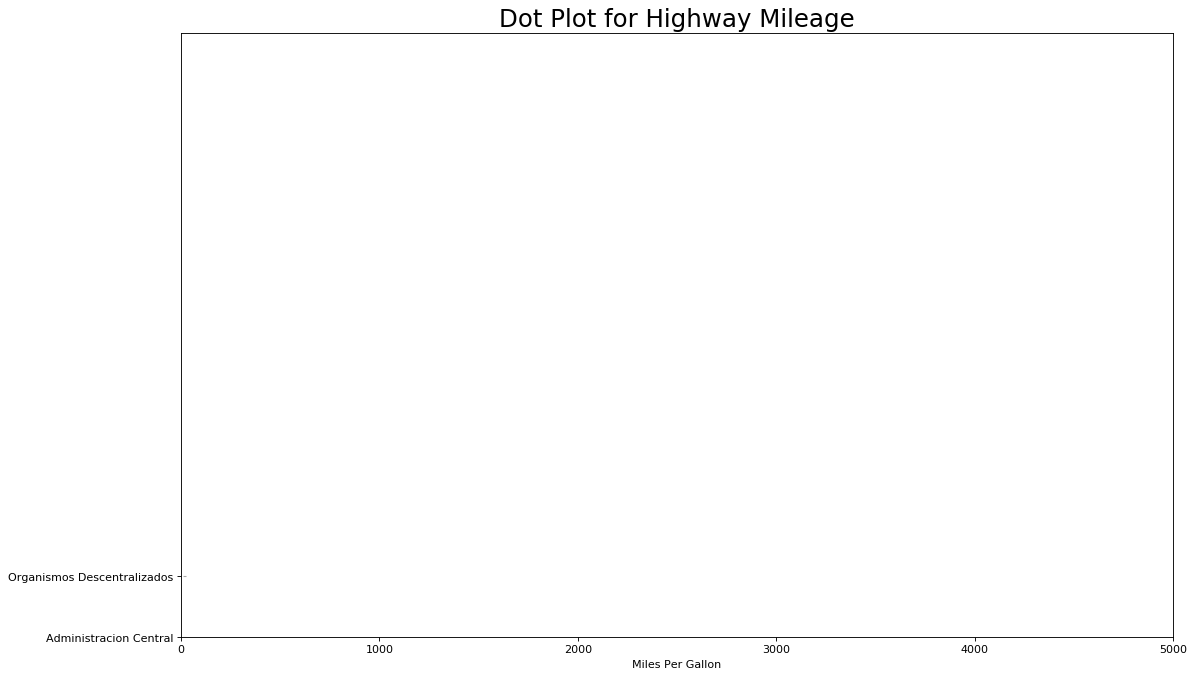

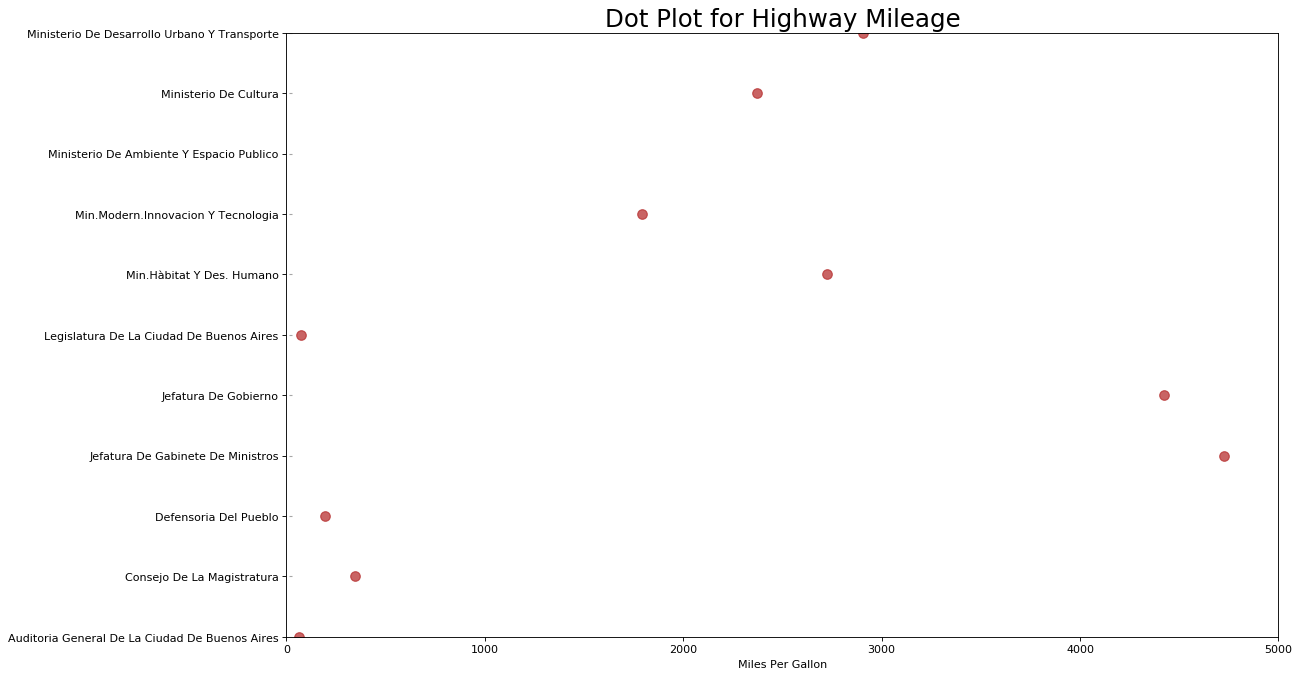

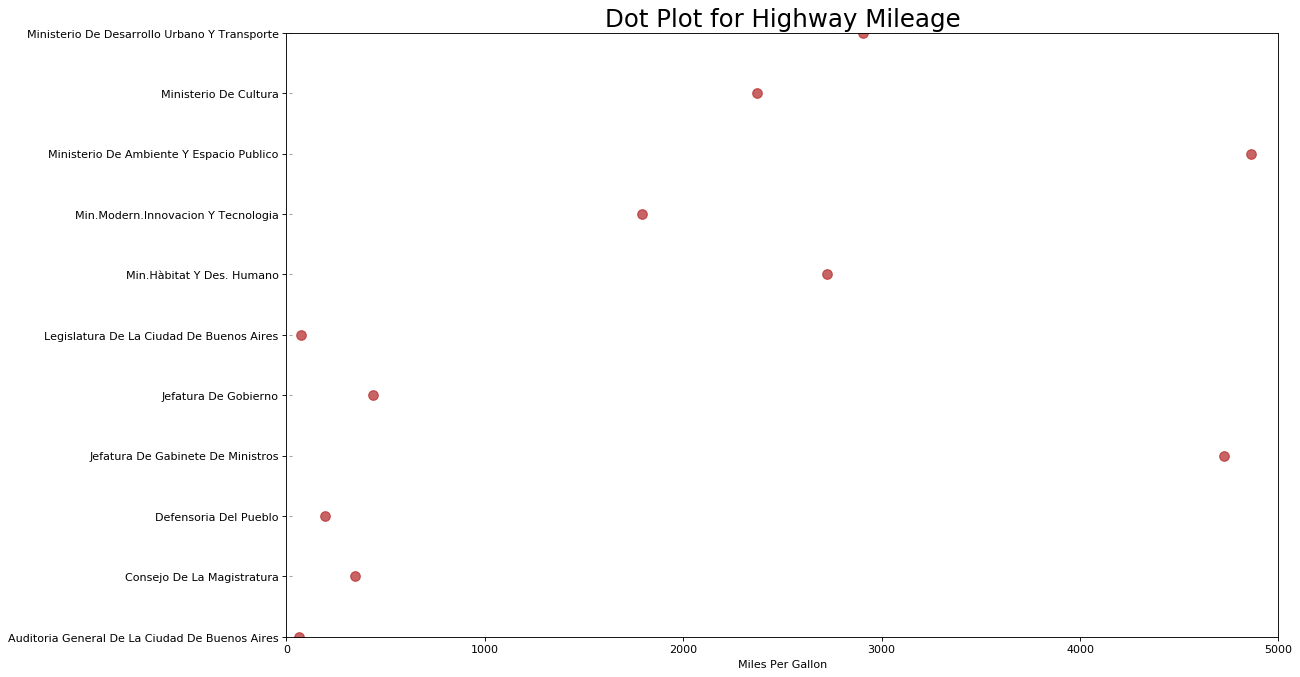

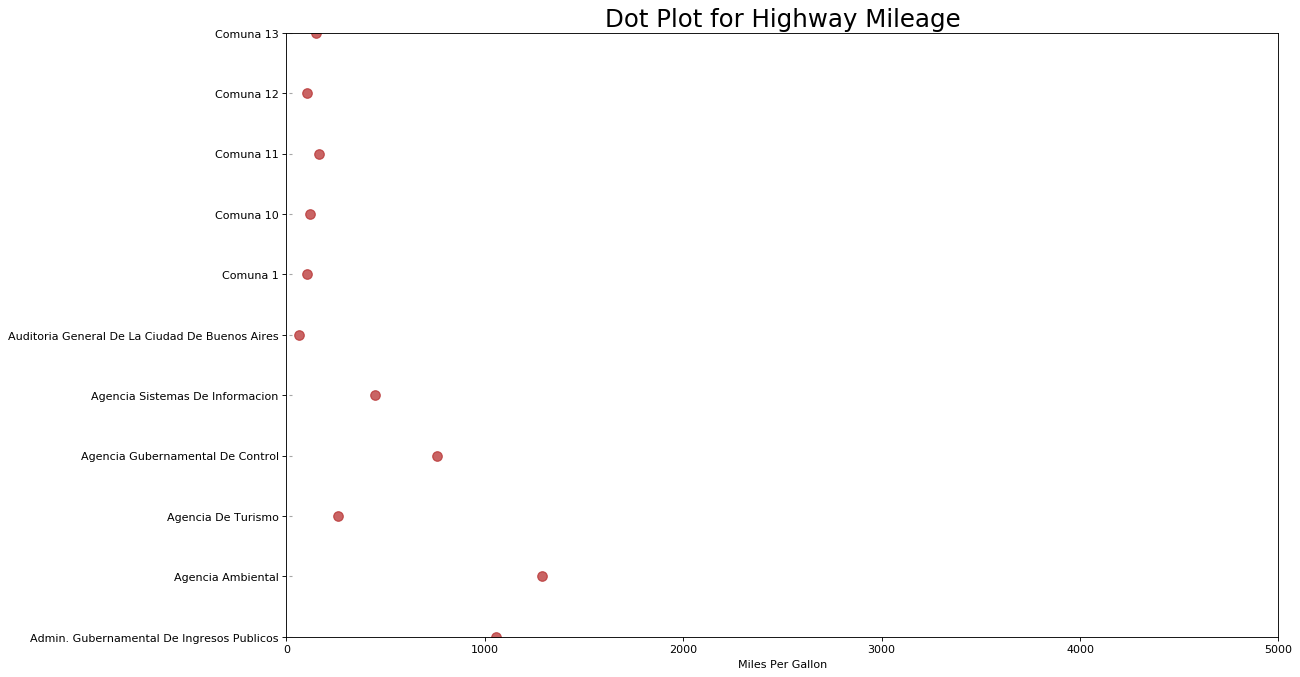

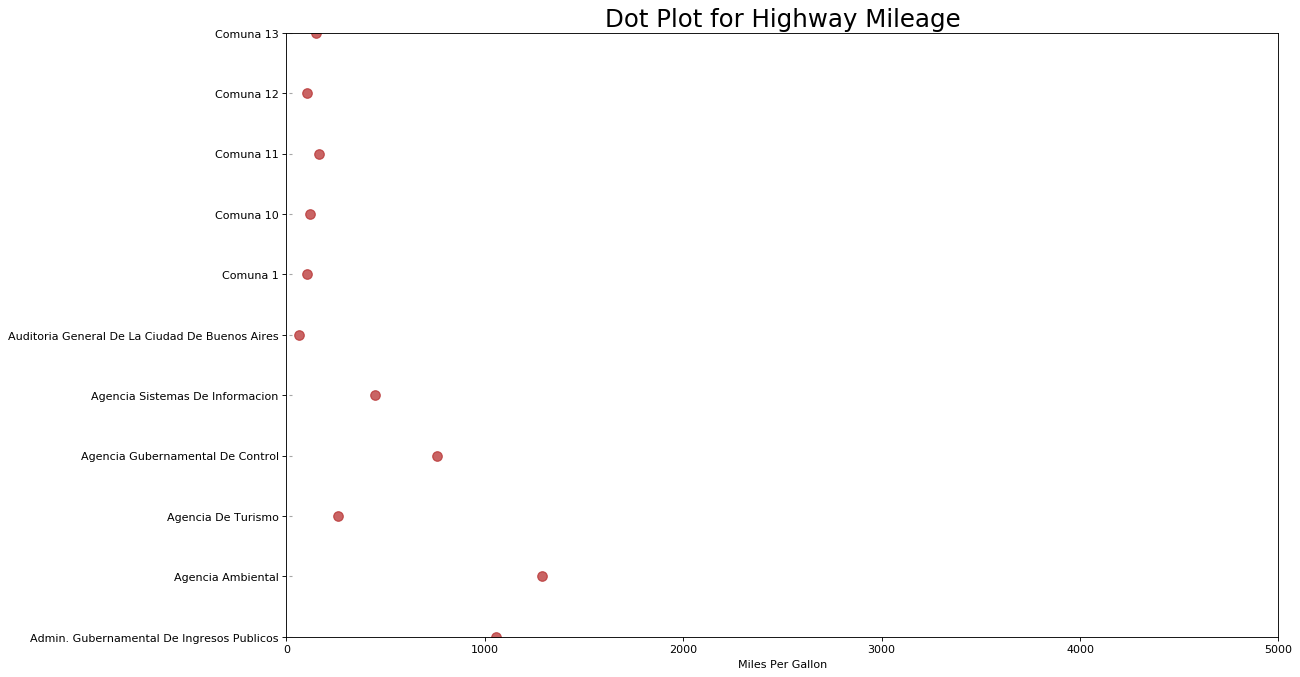

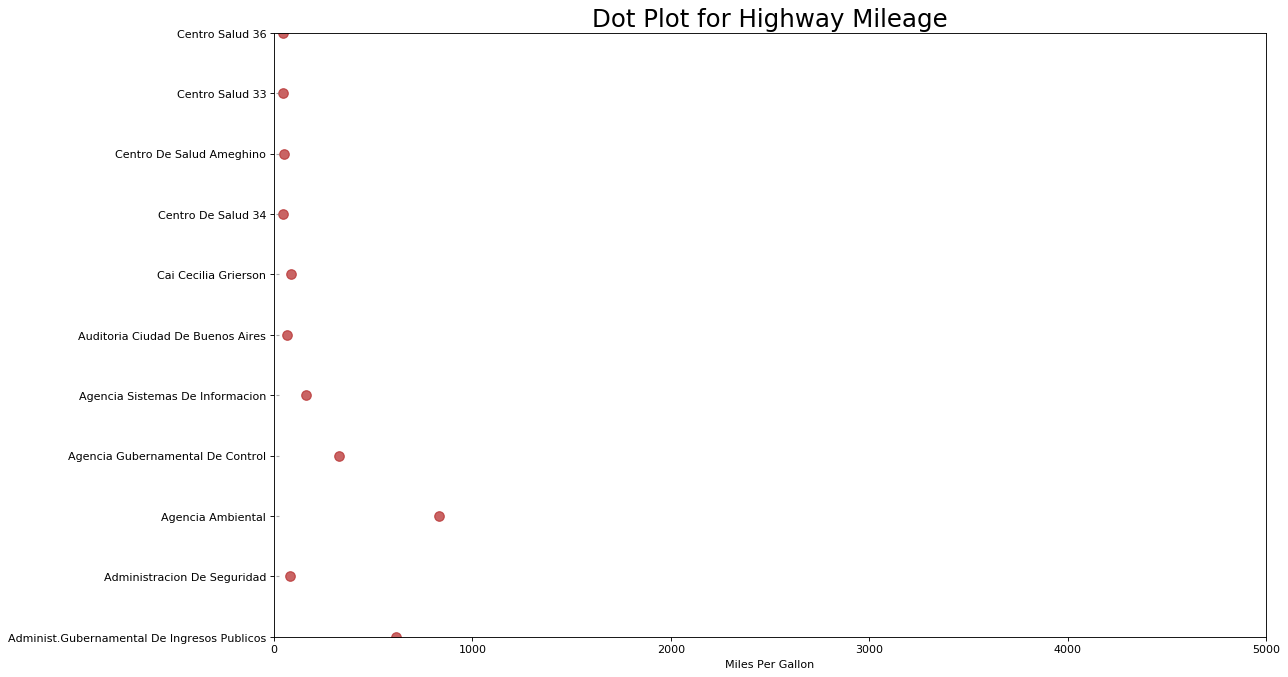

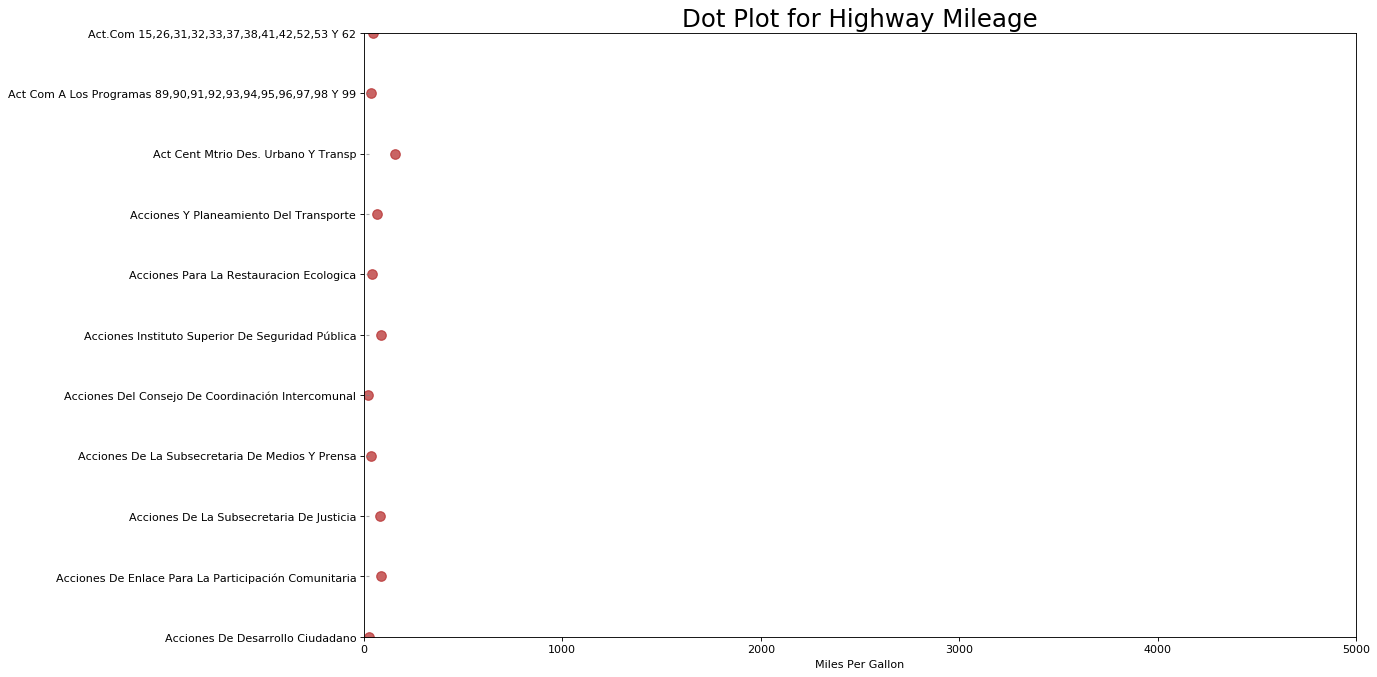

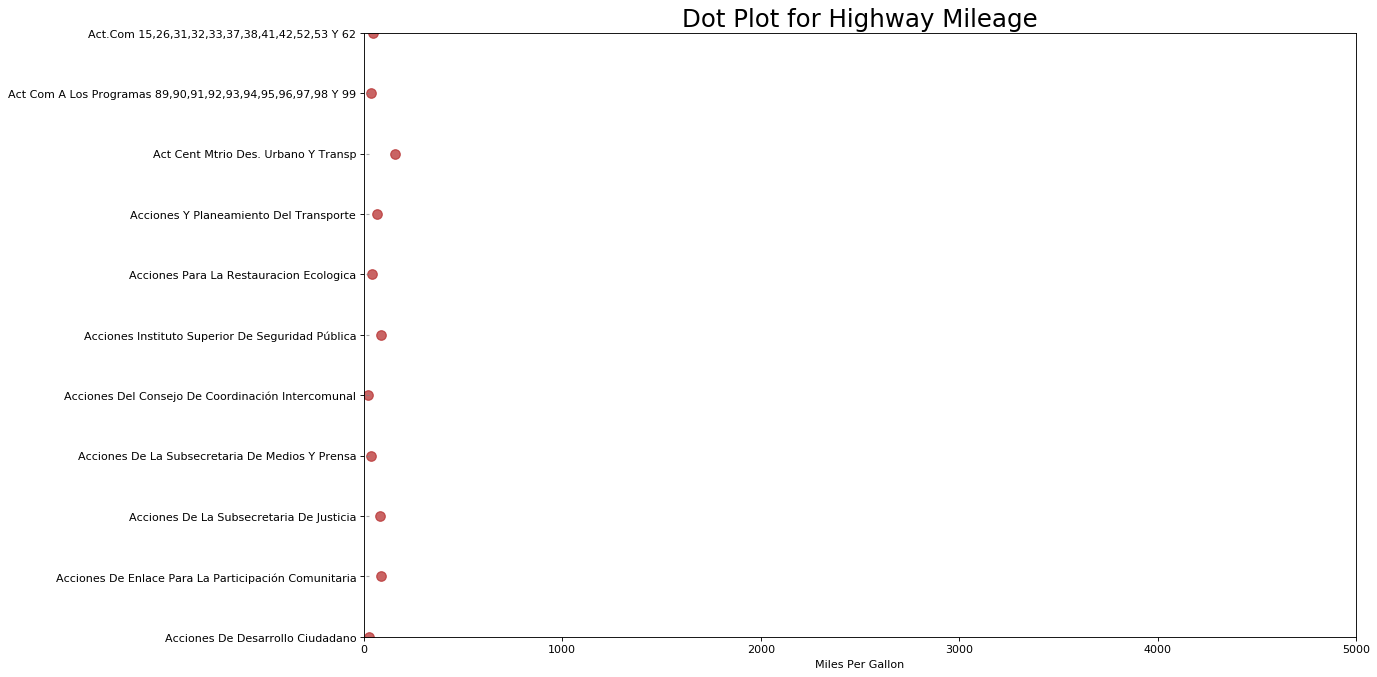

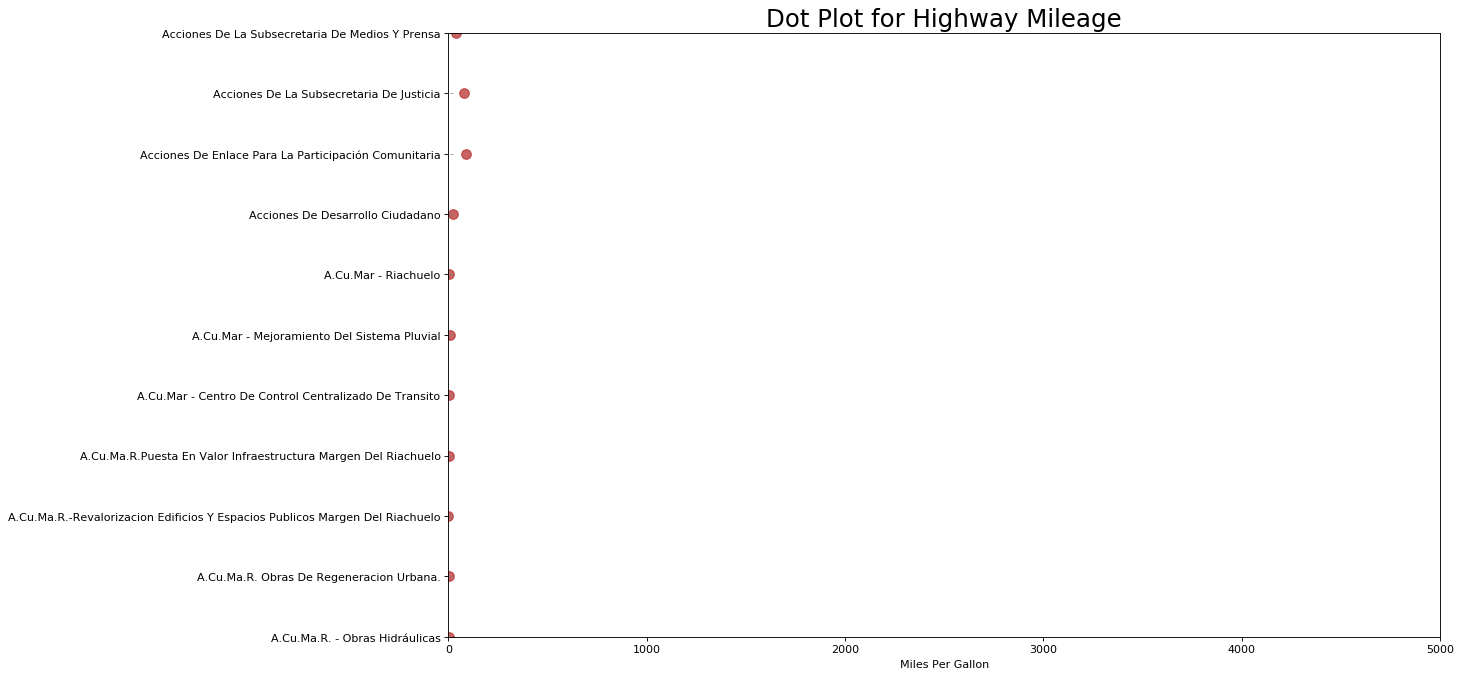

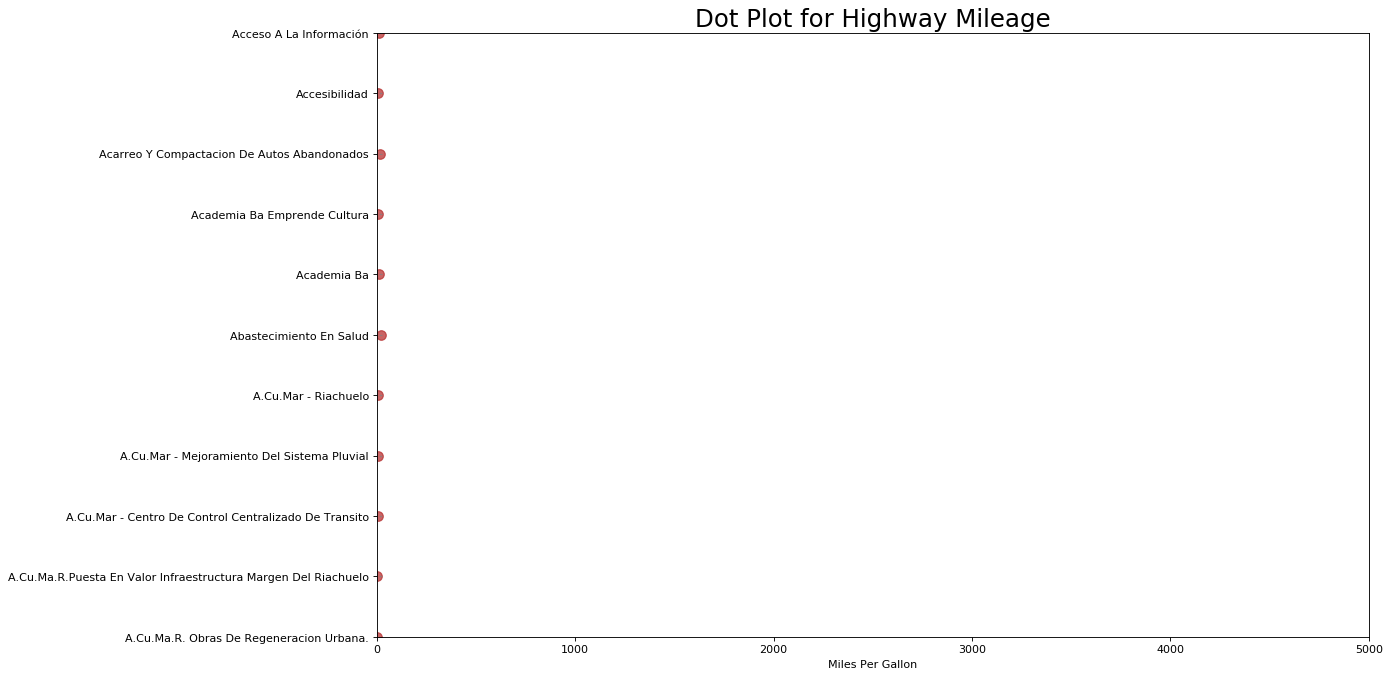

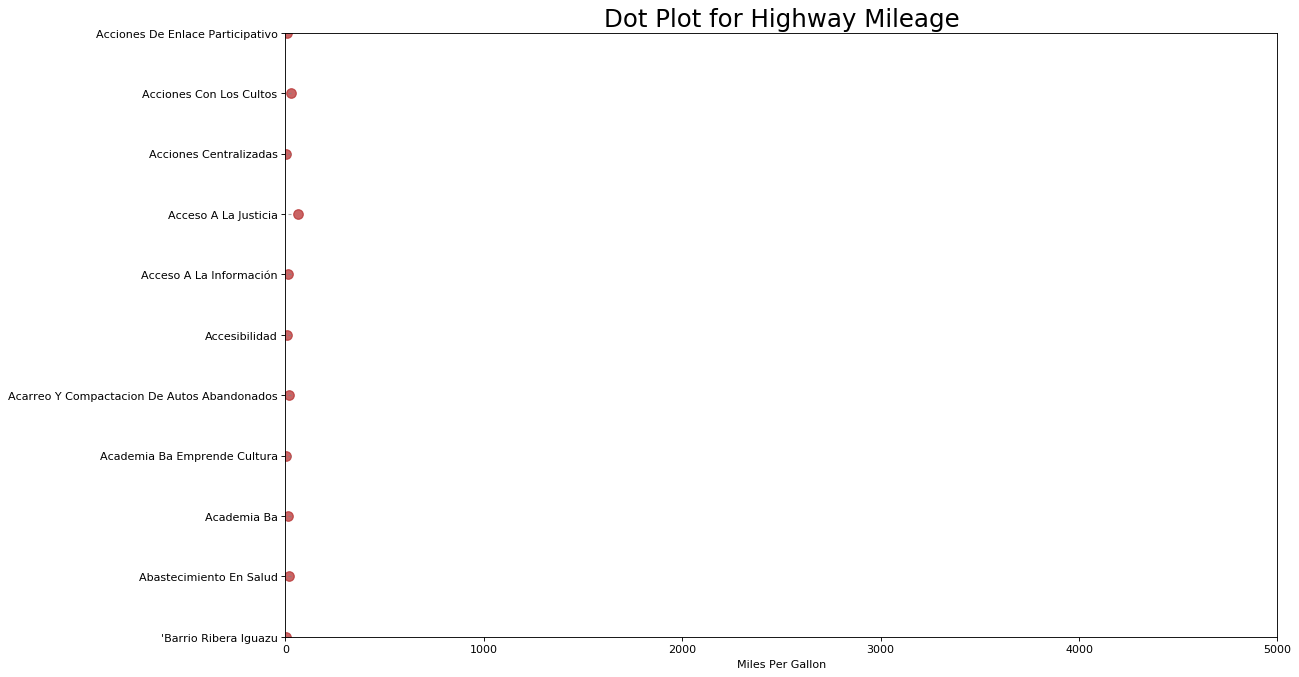

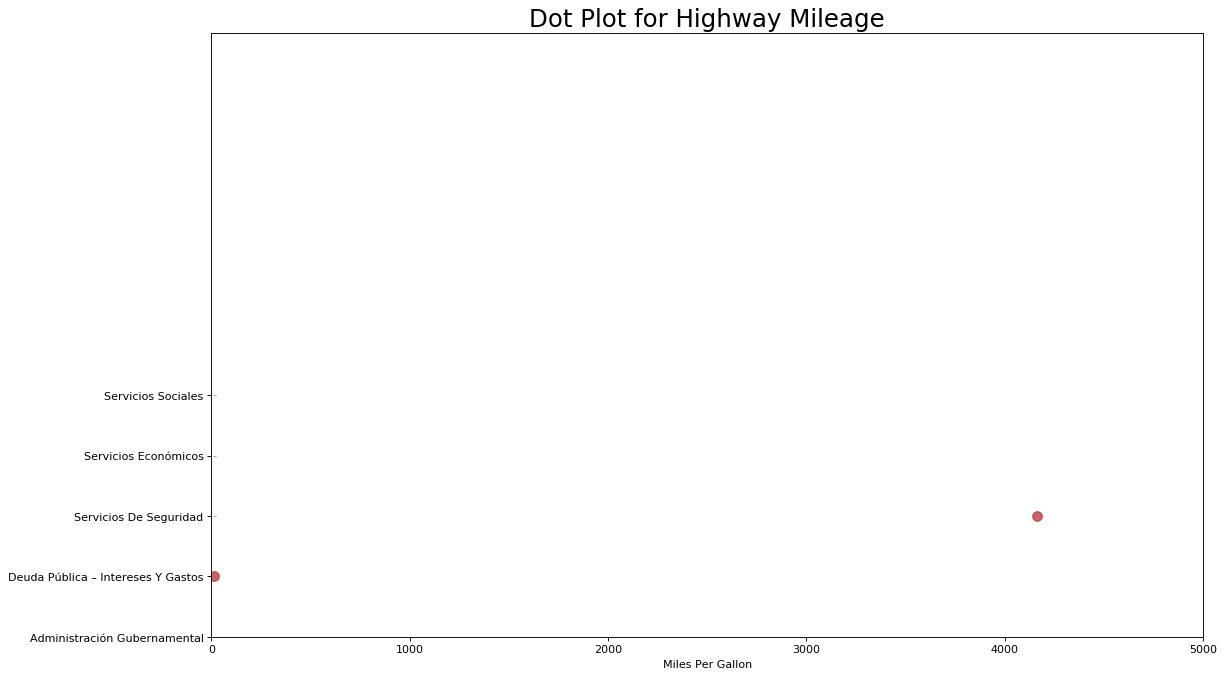

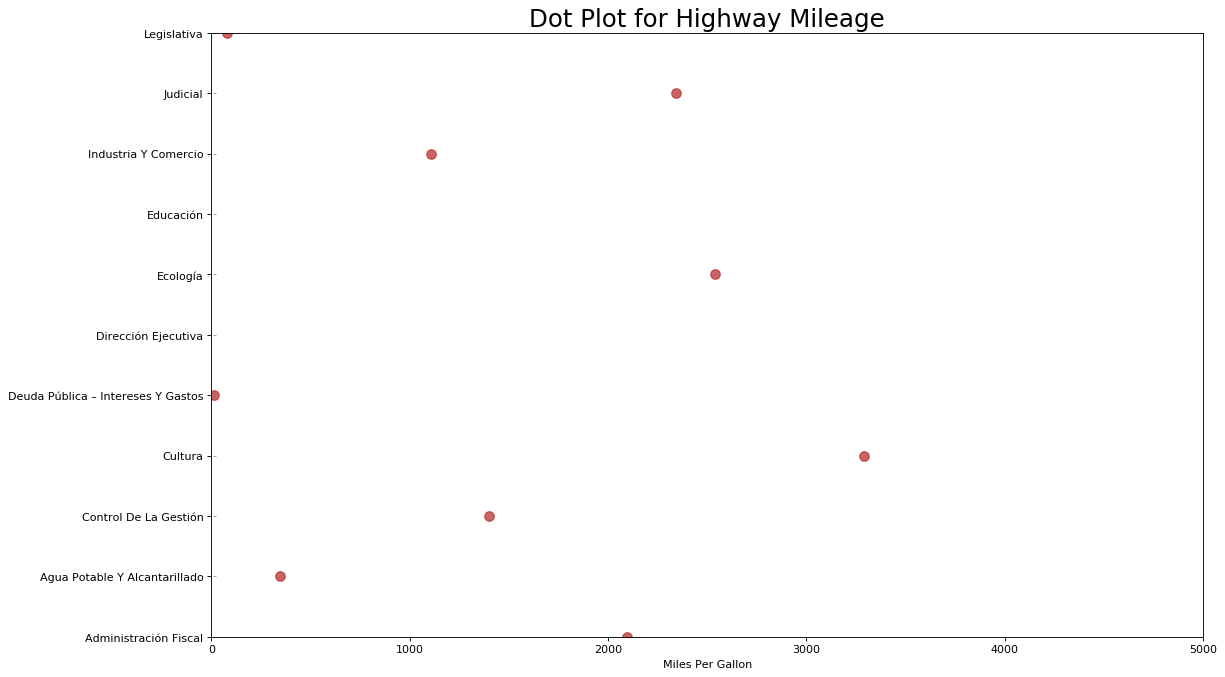

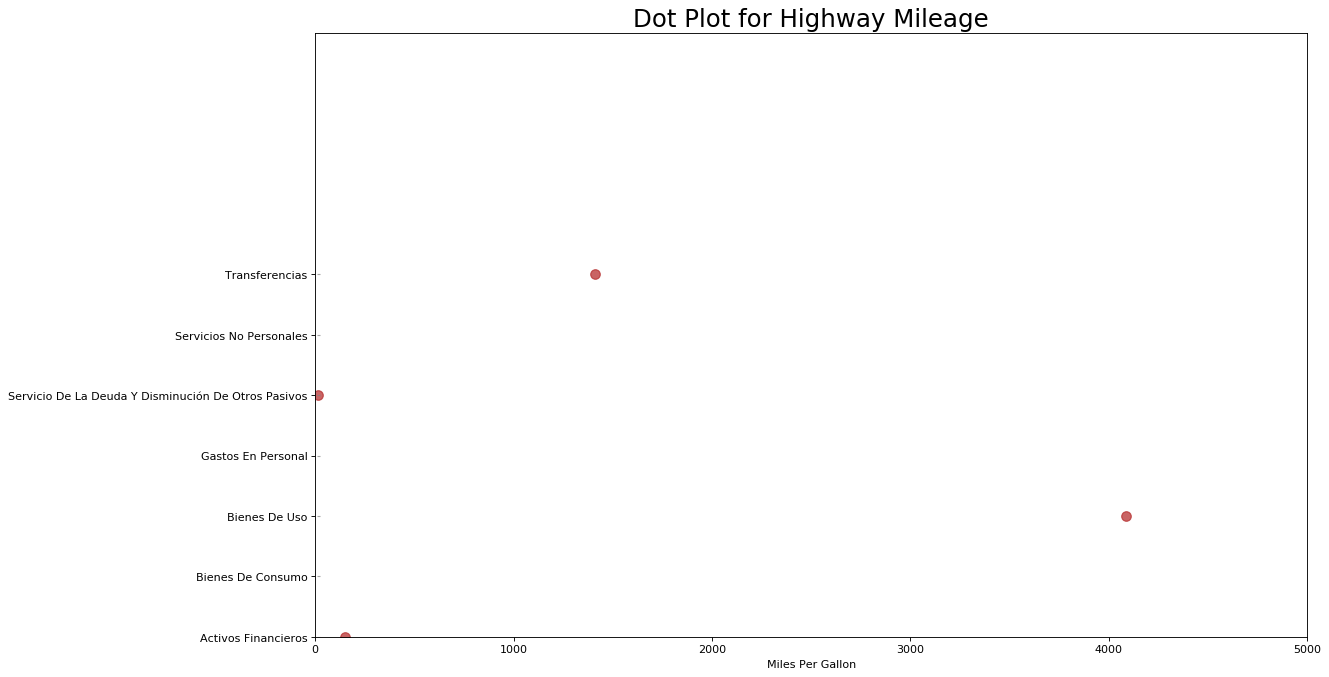

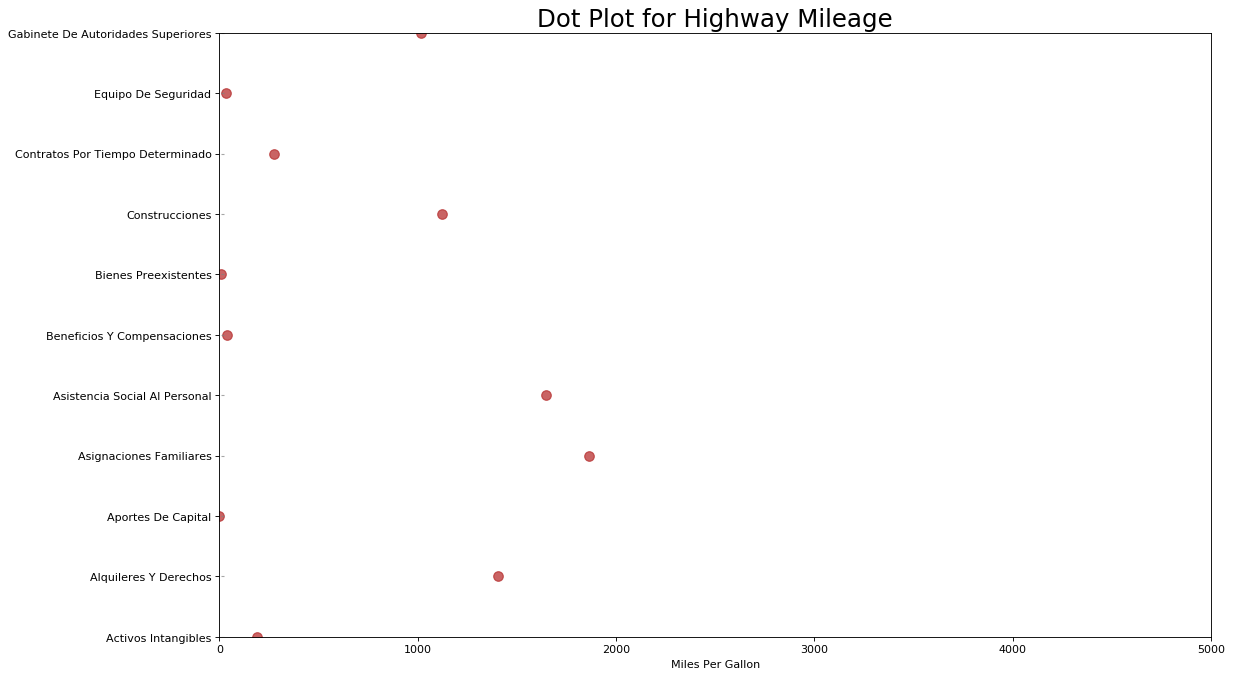

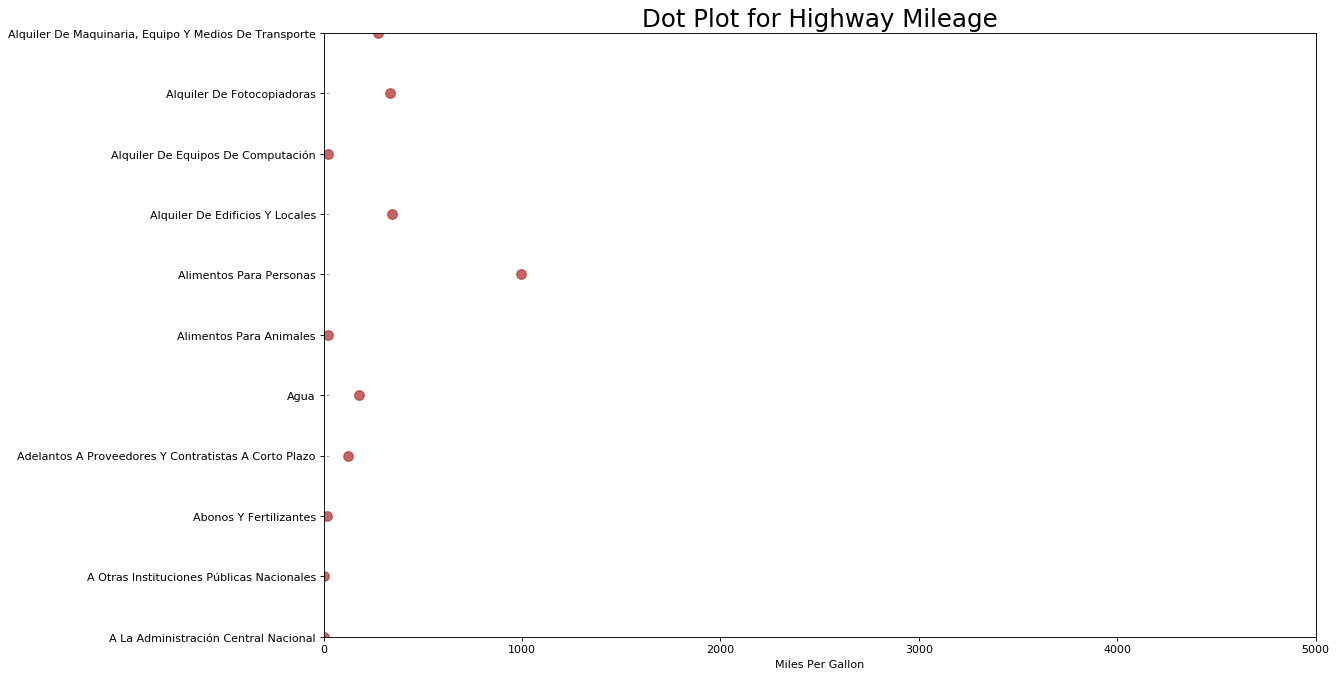

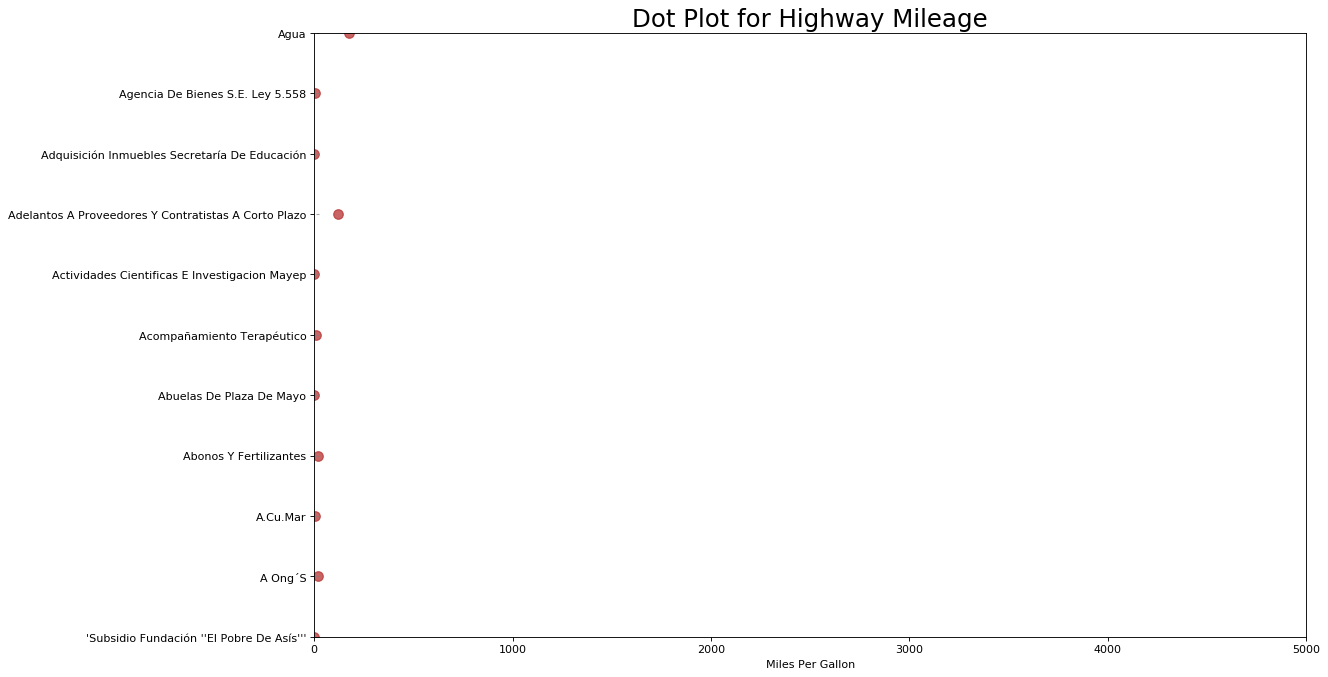

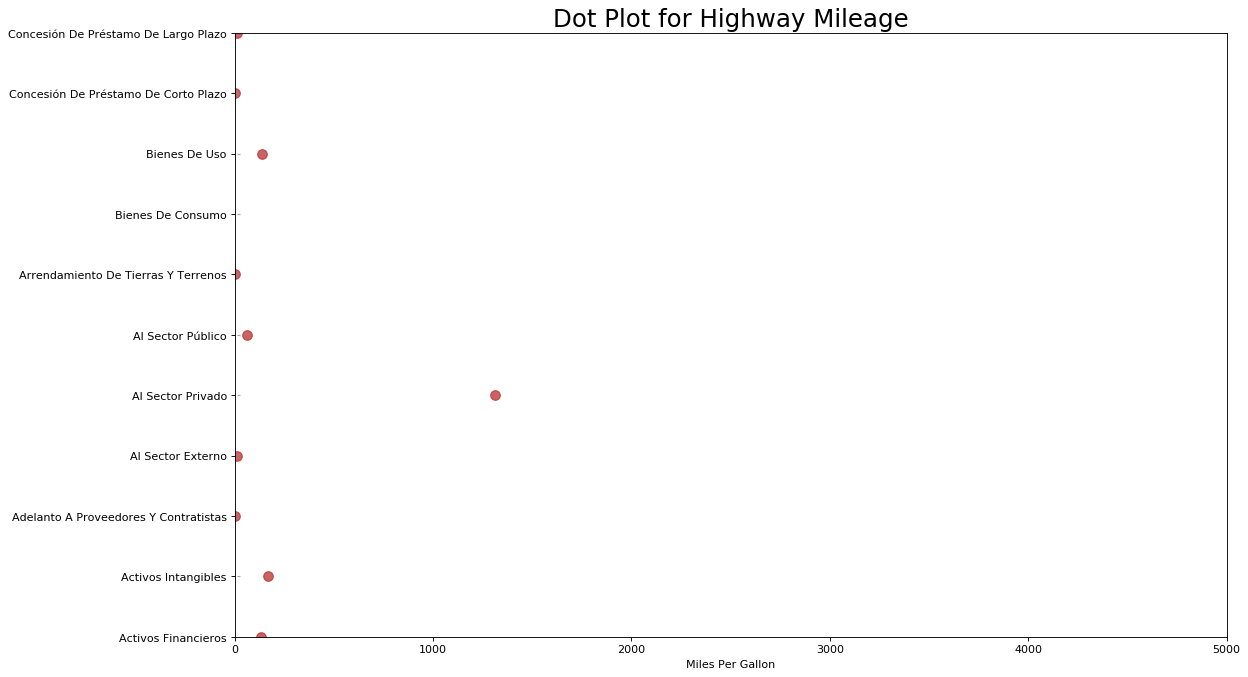

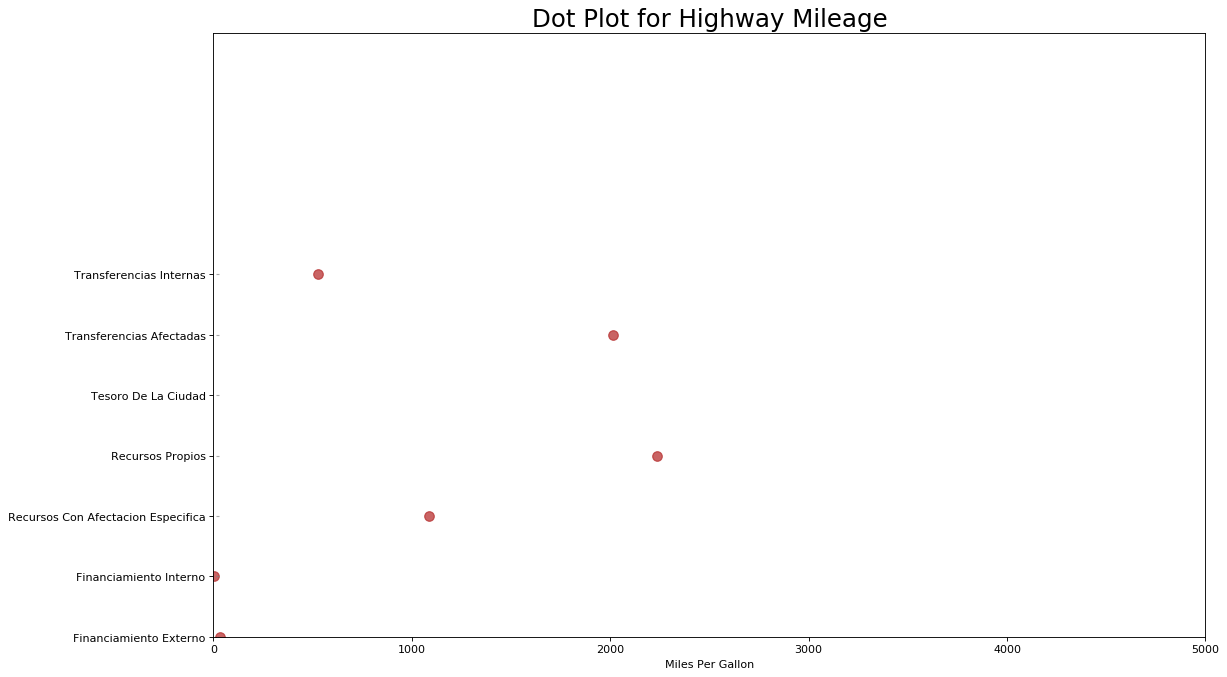

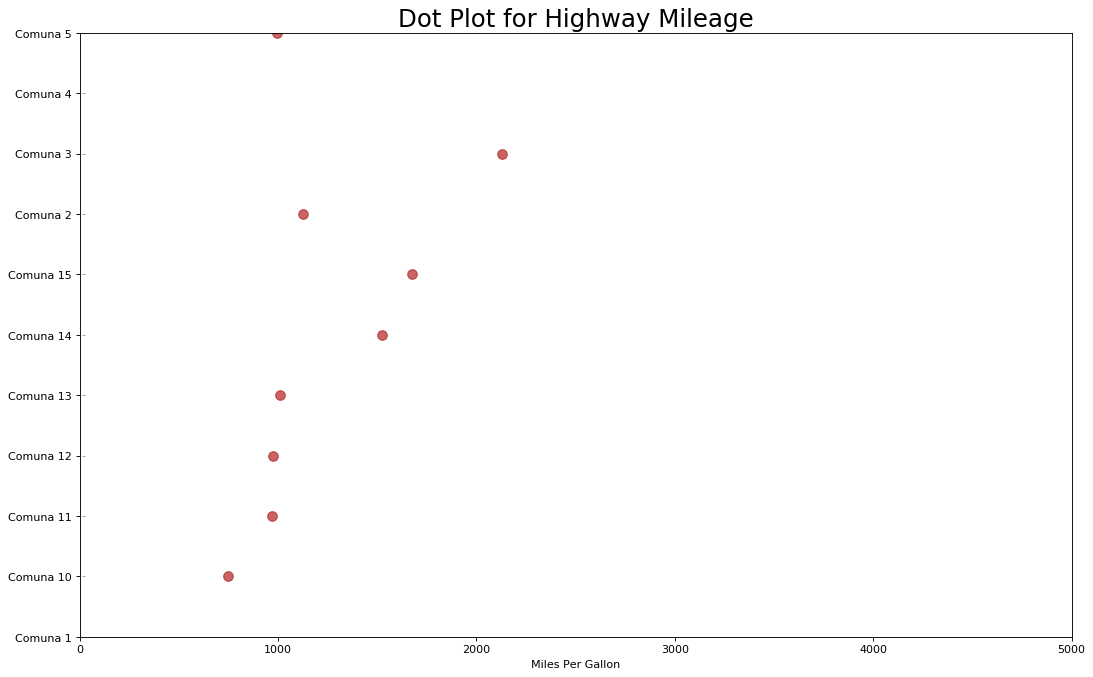

In [83]:
df_categoricas = presupuesto.select_dtypes(include=['object'])
for column in df_categoricas:
    df_car = presupuesto[[column]].groupby([column])[column].count().reset_index(name='Cantidad')
    df_car["Porcentaje"] = df_car["Cantidad"]/df_car["Cantidad"].sum()
    df_car = df_car.sort_values(by="Cantidad", ascending = False)
    graficar(df_car, df_car[column], df_car["Cantidad"])
    #display(df_car)
    #print(column)
    #print(df_categoricas[column])

In [41]:
df_car = presupuesto[["Car_desc"]].groupby(["Car_desc"])["Car_desc"].count().reset_index(name='Cantidad')
df_car["Porcentaje"] = df_car["Cantidad"]/df_car["Cantidad"].sum()
display(df_car)

,Car_desc,Cantidad,Porcentaje
0,Administracion Central,40450,0.8288764574
1,Organismos Descentralizados,8351,0.1711235426


In [42]:
df_numericas = presupuesto.select_dtypes(include=['float'])
for column in df_numericas:
    #print(column)
    #print(df_categoricas[column])
    print(df_numericas.quantile(0.5, numeric_only=False))


Definitivo    9170.00
Devengado     6179.34
Name: 0.5, dtype: float64
Definitivo    9170.00
Devengado     6179.34
Name: 0.5, dtype: float64


Siendo las obras ejecutadas en el marco de una actividad que pertenece a un proyecto que depende de un programa.

Para definir el tipo de gasto que corresponde la obra se utiliza una relación entre los campos Inc, Ppal, Par, Spar

Con estos campos se puede ver el detalle de los gastos que ocaciono la obra.

Esto de abajo es solo para tener a mano

In [43]:
#df_categoricas = presupuesto.drop(columns=["Sanción", "Vigente", "Definitivo", "Devengado"])
#df_categoricas = df_categoricas.drop(columns=["Car","Jur","Sjur","Ent","Og","UE","Prog","Sprog","Proy","Actividad","Ob","Fin","Fun","Inc","Ppal","Par","Spar","Eco","Fte","Geo"])
#df_categoricas = df_categoricas.drop_duplicates()
#display(df_categoricas)

In [44]:
#df_actividad = presupuesto.groupby(["Actividad", "Act_desc"])["Actividad"].count()
#display(df_actividad)

In [45]:
#df_categoricas = df_categoricas.groupby(["Car","Car_desc","Jur","Jur_desc","Sjur","Sjur_desc","Ent","Ent_desc","Og","Og_desc","UE","UE_desc","Prog","Prog_desc","Sprog","Sprog_desc","Proy","Proy_desc","Actividad","Act_desc","Ob","ob_desc","Fin","Fin_desc","Fun","Fun_desc","Inc","Inc_desc","Ppal","Ppal_desc","Par","Par_desc","Spar","Spar_desc","Eco","Eco_desc","Fte","Fte_desc","Geo","Geo_desc"])["Car"].count()

In [46]:
#df_categoricas

In [47]:
df_actividad = presupuesto[["Spar","Spar_desc"]]
df_actividad = df_actividad.drop_duplicates()
df_actividad = df_actividad.query('Spar_desc.str.contains("Convenios De Colaboración Deportiva")', engine='python')
df_actividad = df_actividad.sort_values(by="Spar_desc")

display(df_actividad)

,Spar,Spar_desc
1262,54,Convenios De Colaboración Deportiva (Ley 1624)
1343,53,Convenios De Colaboración Deportiva (Ley 1624)


In [48]:
df_partida = presupuesto[["Inc_desc","Ppal_desc","Par_desc","Spar_desc"]].drop_duplicates()

display(df_partida)

,Inc_desc,Ppal_desc,Par_desc,Spar_desc
0,Gastos En Personal,Personal Permanente,Retribución Del Cargo,Retribución Del Cargo
1,Gastos En Personal,Personal Permanente,Sueldo Anual Complementario,Sueldo Anual Complementario
2,Gastos En Personal,Personal Permanente,Contribuciones Patronales,Contribuciones Patronales
3,Gastos En Personal,Personal Transitorio,Retribución Del Cargo,Retribución Del Cargo
4,Gastos En Personal,Personal Transitorio,Sueldo Anual Complementario,Sueldo Anual Complementario
5,Gastos En Personal,Personal Transitorio,Contribuciones Patronales,Contribuciones Patronales
6,Gastos En Personal,Asignaciones Familiares,Personal Permanente,Personal Permanente
7,Gastos En Personal,Beneficios Y Compensaciones,Beneficios Y Compensaciones Sin Discriminar,Beneficios Y Compensaciones Sin Discriminar
8,Bienes De Consumo,"Productos Alimenticios, Agropecuarios Y Forestales",Alimentos Para Personas,Alimentos Para Personas
9,Bienes De Consumo,"Productos Alimenticios, Agropecuarios Y Forestales","Madera, Corcho Y Sus Manufacturas","Madera, Corcho Y Sus Manufacturas"


In [49]:
df_partida = presupuesto[["Par_desc","Spar_desc"]]

display(df_partida)

,Par_desc,Spar_desc
0,Retribución Del Cargo,Retribución Del Cargo
1,Sueldo Anual Complementario,Sueldo Anual Complementario
2,Contribuciones Patronales,Contribuciones Patronales
3,Retribución Del Cargo,Retribución Del Cargo
4,Sueldo Anual Complementario,Sueldo Anual Complementario
5,Contribuciones Patronales,Contribuciones Patronales
6,Personal Permanente,Personal Permanente
7,Beneficios Y Compensaciones Sin Discriminar,Beneficios Y Compensaciones Sin Discriminar
8,Alimentos Para Personas,Alimentos Para Personas
9,"Madera, Corcho Y Sus Manufacturas","Madera, Corcho Y Sus Manufacturas"


In [50]:
df_actividad = presupuesto.drop_duplicates()
df_actividad = presupuesto.query('Spar_desc.str.contains("Cueros Y Pieles")', engine='python')

pd.set_option('display.max_rows', 1)
display(df_actividad)

,Car,Car_desc,Jur,Jur_desc,Sjur,Sjur_desc,Ent,Ent_desc,Og,Og_desc,UE,UE_desc,Prog,Prog_desc,Sprog,Sprog_desc,Proy,Proy_desc,Actividad,Act_desc,Ob,ob_desc,Fin,Fin_desc,Fun,Fun_desc,Inc,Inc_desc,Ppal,Ppal_desc,Par,Par_desc,Spar,Spar_desc,Eco,Eco_desc,Fte,Fte_desc,Geo,Geo_desc,Sanción,Vigente,Definitivo,Devengado
2095,1,Administracion Central,20,Jefatura De Gobierno,22,Sec.Gral. Y Realaciones Internacionales,0,Sec.Gral. Y Realaciones Internacionales,220,Sec.Gral. Y Realaciones Internacionales,2004,Subsecretaria De Relaciones Internacionales E Institucionales,4,Actividades Comunes A Los Programas 21 27 Y 28,0,Actividades Comunes A Los Programas 21 27 Y 28,0,Actividades Comunes A Los Programas 21 27 Y 28,10000,Planificación Relaciones Internacionales E Institucionales,0,Planificación Relaciones Internacionales E Institucionales,1,Administración Gubernamental,3,Dirección Ejecutiva,2,Bienes De Consumo,4,Productos De Cuero Y Caucho,1,Cueros Y Pieles,0,Cueros Y Pieles,21310000,Bienes De Consumo,11,Tesoro De La Ciudad,4,Comuna 4,9840,9840,0.0,0.0
